In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,export_graphviz 
from sklearn.model_selection import train_test_split
from statsmodels.discrete.discrete_model import Logit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [4]:
import re

In [6]:
data=pd.read_csv('final2222.csv')

#  Summary statistics and visualisation

In [7]:
data.head()

,Unnamed: 0,Movie_title,Audience_review,Critic_review,Runtime,Distributor,Covered,Actors,Producer,Cinematography,Editing,Music
0,0,Love Ranch,28,13,117.0,0,0,0,0,0,1,0
1,1,Alita: Battle Angel,93,61,122.0,1,1,0,0,1,0,0
2,2,UglyDolls,58,27,87.0,0,1,0,0,0,0,1
3,5,Iron Sky: The Coming Race,27,33,92.0,0,0,0,0,0,0,0
4,8,Charlie Says,84,58,140.0,0,0,0,0,0,0,0


## Dependent variable is dividend: 1-pays dividend, 0-does not pay dividend.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 12 columns):
Unnamed: 0         2517 non-null int64
Movie_title        2517 non-null object
Audience_review    2517 non-null object
Critic_review      2517 non-null object
Runtime            2517 non-null float64
Distributor        2517 non-null int64
Covered            2517 non-null int64
Actors             2517 non-null int64
Producer           2517 non-null int64
Cinematography     2517 non-null int64
Editing            2517 non-null int64
Music              2517 non-null int64
dtypes: float64(1), int64(8), object(3)
memory usage: 236.1+ KB


In [9]:
#data["Audience_review"] = data.Audience_review.apply(lambda a: re.findall("\d+", a)[0]).apply(int)

In [10]:
data.describe()

,Unnamed: 0,Runtime,Distributor,Covered,Actors,Producer,Cinematography,Editing,Music
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,2617.810489,103.638804,0.288439,0.646007,0.176798,0.061184,0.174414,0.132698,0.274136
std,1428.460309,18.227213,0.453126,0.478302,0.381573,0.239715,0.379540,0.339315,0.446166
min,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1388.000000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2670.000000,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3877.000000,112.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5006.000000,272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


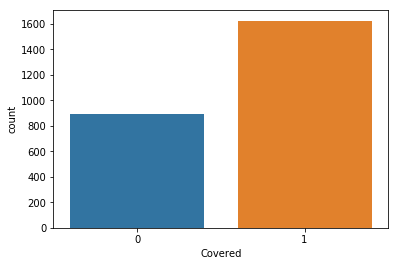

1    64.6
0    35.4
Name: Covered, dtype: float64


In [11]:
sns.countplot(data.Covered)
plt.show()
print((data.Covered.value_counts()/len(data)*100).round(2))

In [12]:
print((data.Covered.value_counts()/len(data)*100).round(2))

1    64.6
0    35.4
Name: Covered, dtype: float64


C:\Users\arman\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


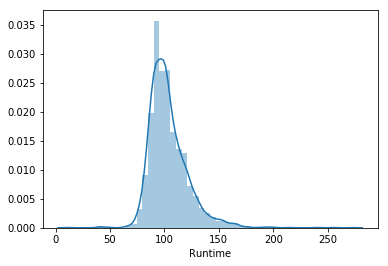

In [13]:
#plot the distribution using seaborn
sns.distplot(data.Runtime)
plt.show()

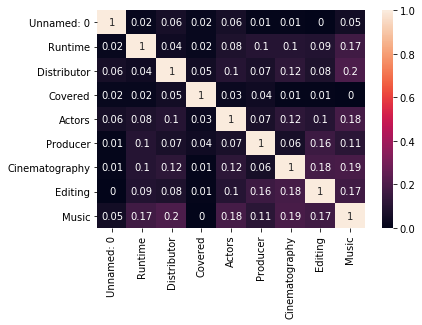

In [14]:
#Lets check for correlations
sns.heatmap(data.corr().abs().round(2),annot=True)
plt.show()
#we can see that there are many correlated variables
#plt.figure(figsize=(15, 7)) 
#sns.heatmap(data_numeric.corr().abs().round(2)>0.75, annot=True)
#plt.show()

In [15]:
data=data.drop(["Unnamed: 0","Movie_title"],axis=1)

#  Transform data


In [16]:
#deviding into object and numeric datasets
#data_object=data.select_dtypes(include="object")
data_numeric=data.select_dtypes(exclude="object")

In [17]:
#let's check number of uniques values of object variables
print([data_object[i].value_counts() for i in data_object.columns])

NameError: name 'data_object' is not defined

In [18]:
#let's check for 0 variance of numeric variables
print(data_numeric.var()==0)

Runtime           False
Distributor       False
Covered           False
Actors            False
Producer          False
Cinematography    False
Editing           False
Music             False
dtype: bool


In [19]:
#for i in data_object.columns:
 #   print(data_object[i].unique())

In [20]:
# data_numeric.drop(["ID","age"],axis=1,inplace=True) if we want to drop something

In [21]:
#making object variables into dummies, join back datasets
#data_dummies=pd.get_dummies(data_object,drop_first=True)
#data_final=data_dummies.join(data_numeric)
data_final=data_numeric
X=data_final.drop("Covered",axis=1)
Y=data_final.Covered
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)# train-test split

#  4 Modeling


##  Lets create 3 models:

Model 1-Logistic Regression from statsmodel

Model 2-Logistic Regression from sklearn

Model 3-Decision Tree Classification

# Model 1.Logistic Regression from statsmodel

In [22]:
formula="Covered~"+"+".join(X.columns)
formula

'Covered~Runtime+Distributor+Actors+Producer+Cinematography+Editing+Music'

In [23]:
model1=Logit.from_formula(formula=formula,data=data_final).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.646728
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Covered   No. Observations:                 2517
Model:                          Logit   Df Residuals:                     2509
Method:                           MLE   Df Model:                            7
Date:                Fri, 16 Aug 2019   Pseudo R-squ.:                0.004855
Time:                        19:56:04   Log-Likelihood:                -1627.8
converged:                       True   LL-Null:                       -1635.8
                                        LLR p-value:                   0.02621
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3336      0.245      1.359      0.174      -0.147       0.815
Runtime            0.0026      0.002      1.085      0.278      -0.002       0.007
Distributor        0.2704      0.096      2.803      0.005       0.081       0.459
Actors            -0.1688      0.111     -1.520      0.128      -0.386       0.049
Producer          -0.3877      0.173     -2.247      0.025      -0.726      -0.050
Cinematography    -0.0919      0.114     -0.808      0.419      -0.315       0.131
Editing            0.0041      0.128      0.032      0.975      -0.247       0.255
Music             -0.0157      0.100     -0.157      0.875      -0.212       0.181
==================================================================================
"""

In [24]:
print(model1.pvalues<=0.05)

Intercept         False
Runtime           False
Distributor        True
Actors            False
Producer           True
Cinematography    False
Editing           False
Music             False
dtype: bool


In [25]:
#making summary as dataframe to manipulate easily
log_summary=pd.read_html(model1.summary().tables[1].as_html(),header=0)[0]
log_summary=log_summary.rename(columns={"Unnamed: 0":"Parameter"})
log_summary[["Parameter","coef"]][(log_summary["P>|z|"]<=0.05)] 

,Parameter,coef
2,Distributor,0.2704
4,Producer,-0.3877


## Let's get marginal effects to be able to interpret how much each variable changes the probability of churning.

In [26]:
model1.get_margeff().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                Covered
Method:                          dydx
At:                           overall
==================================================================================
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Runtime            0.0006      0.001      1.086      0.277      -0.000       0.002
Distributor        0.0614      0.022      2.819      0.005       0.019       0.104
Actors            -0.0383      0.025     -1.523      0.128      -0.088       0.011
Producer          -0.0881      0.039     -2.256      0.024      -0.165      -0.012
Cinematography    -0.0209      0.026     -0.808      0.419      -0.071       0.030
Editing            0.0009      0.029      0.032      0.975      -0.056       0.058
Music             -0.0036      0.023     -0.157      0.875      -0.048       0.041
==================================================================================
"""

In [27]:
marg_summary=pd.read_html(model1.get_margeff().summary().tables[1].as_html(),header=0)[0]
marg_summary=marg_summary.rename(columns={"Unnamed: 0":"Parameter"})
marg_summary[["Parameter","dy/dx"]][(marg_summary["P>|z|"]<=0.05)] 

,Parameter,dy/dx
1,Distributor,0.0614
3,Producer,-0.0881


## Interpreting for categorical variable: employee having low salary has on average 26.8% higher probability to churn copared employee who has high salary.


## Interpreting for continous variable: Incremental increase in promotion last 5 years decreases the probability of being churn on average by 19.7% when other factors held constant.


# Model Fitting


In [28]:
#getting best parameters for Logit 


grid_search1=GridSearchCV(LogisticRegression(random_state=42,class_weight="balanced"),
                          param_grid={"C":np.linspace(0.0001,1,25),"penalty":["l1","l2"]},scoring="roc_auc",cv=5,n_jobs=-1)
grid_search1.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-04, 4.17625e-02, 8.34250e-02, 1.25087e-01, 1.66750e-01,
       2.08412e-01, 2.50075e-01, 2.91737e-01, 3.33400e-01, 3.75062e-01,
       4.16725e-01, 4.58387e-01, 5.00050e-01, 5.41712e-01, 5.83375e-01,
       6.25037e-01, 6.66700e-01, 7.08363e-01, 7.50025e-01, 7.91687e-01,
       8.33350e-01, 8.75012e-01, 9.16675e-01, 9.58337e-01, 1.00000e+00]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [29]:
logit1=LogisticRegression(C=1,penalty='l2', random_state=42,class_weight="balanced")
logit1.fit(x_train,y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [30]:
# gridsearch for decision tree
gridsearch2=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid={"max_depth":(5,15),"min_samples_leaf":(20,100),
                                                                             "class_weight":["balanced"]},
                                                                scoring="roc_auc",
                                                                cv=5,n_jobs=-1).fit(X,Y)

In [31]:
print("Best parameters:",gridsearch2.best_params_)
print("Best score:",gridsearch2.best_score_.round(2)*100)

Best parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 20}
Best score: 51.0


In [32]:
tree1=DecisionTreeClassifier(class_weight='balanced',random_state=42,max_depth=5,min_samples_leaf=20).fit(x_train,y_train)

# Model Evaluation


### Confusion matrix


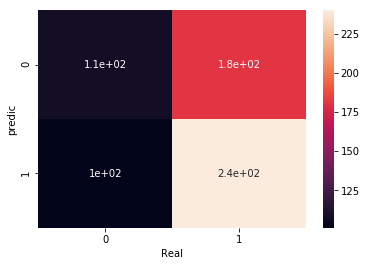

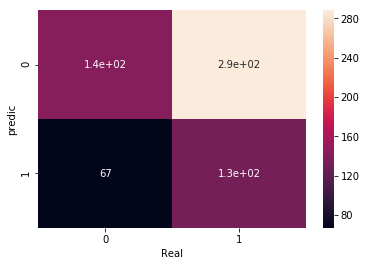

In [33]:
#let's print confusion matrix for logit and decision tree
for i in [logit1,tree1]:
    sns.heatmap(confusion_matrix(y_test,i.predict(x_test)).T,annot=True)
    plt.xlabel("Real")
    plt.ylabel("predic")
    plt.show()

## Classification report

In [34]:
for i in [logit1,tree1]:
    print(classification_report(y_test,i.predict(x_test)))

             precision    recall  f1-score   support

          0       0.37      0.52      0.43       209
          1       0.70      0.57      0.63       421

avg / total       0.59      0.55      0.56       630

             precision    recall  f1-score   support

          0       0.33      0.68      0.44       209
          1       0.67      0.32      0.43       421

avg / total       0.55      0.44      0.43       630



## Roc_AUC, Accuracy, Recall


In [36]:
#Logistic Regression
print("Train:",logit1.score(x_train,y_train).round(2)*100)
print("Test:",logit1.score(x_test,y_test).round(2)*100)
ypred1=logit1.predict(x_train)
ypred2=logit1.predict(x_test)
print('Recall for Logit:',recall_score(y_train,ypred1).round(2)*100)
print("Recall for Logit:",recall_score(y_test,ypred2).round(2)*100)
print('roc_auc:1',roc_auc_score(y_train,ypred1).round(2)*100)
print('roc_auc:1',roc_auc_score(y_test,ypred2).round(2)*100)


#Decision Tree
print("Train:",tree1.score(x_train,y_train).round(2)*100)
print("Test:",tree1.score(x_test,y_test).round(2)*100)
ypred3=tree1.predict(x_train)
ypred4=tree1.predict(x_test)
print('Recall for DC 1:',recall_score(y_train,ypred3).round(2)*100)
print("Recall for DC 1:",recall_score(y_test,ypred4).round(2)*100)
print('roc_auc:1',roc_auc_score(y_train,ypred3).round(2)*100)
print('roc_auc:1',roc_auc_score(y_test,ypred4).round(2)*100)

Train: 54.0
Test: 55.00000000000001
Recall for Logit: 54.0
Recall for Logit: 56.99999999999999
roc_auc:1 54.0
roc_auc:1 54.0
Train: 51.0
Test: 44.0
Recall for DC 1: 36.0
Recall for DC 1: 32.0
roc_auc:1 56.99999999999999
roc_auc:1 50.0


## Avereage cross validation roc_auc


In [98]:
print("Logit Avereage cross validation roc_auc:", grid_search1.best_score_)
print("Tree Avereage cross validation roc_auc:", gridsearch2.best_score_)

Logit Avereage cross validation roc_auc: 0.5611785914332758
Tree Avereage cross validation roc_auc: 0.49424485323482253


# ROC Curve


## Logit

In [99]:
FPR,TPR,tresholds=roc_curve(y_test,logit1.predict_proba(x_test)[:,1])
print(FPR,TPR,tresholds)

[0.         0.00478469 0.00478469 0.00956938 0.00956938 0.01435407
 0.01435407 0.01913876 0.01913876 0.02870813 0.02870813 0.03349282
 0.03349282 0.03827751 0.03827751 0.0430622  0.0430622  0.07177033
 0.07177033 0.07655502 0.07655502 0.0861244  0.0861244  0.09569378
 0.09569378 0.10047847 0.10047847 0.10526316 0.10526316 0.11004785
 0.11004785 0.11483254 0.11483254 0.12440191 0.12440191 0.1291866
 0.1291866  0.13875598 0.13875598 0.14354067 0.14354067 0.14832536
 0.14832536 0.15789474 0.15789474 0.16746411 0.16746411 0.1722488
 0.1722488  0.18181818 0.18181818 0.18660287 0.18660287 0.19138756
 0.19138756 0.20095694 0.20095694 0.20574163 0.20574163 0.21052632
 0.21052632 0.215311   0.215311   0.22488038 0.22488038 0.22966507
 0.22966507 0.23444976 0.23444976 0.24401914 0.24401914 0.24880383
 0.24880383 0.25837321 0.25837321 0.26315789 0.26315789 0.26794258
 0.26794258 0.27272727 0.27272727 0.27751196 0.27751196 0.28229665
 0.28229665 0.29186603 0.29186603 0.30143541 0.30143541 0.306220

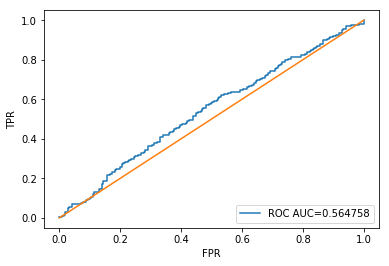

In [109]:
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,model1.predict(x_test)))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## Tree


In [101]:
roc_curve(y_test,tree1.predict_proba(x_test)[:,1])


(array([0.        , 0.10047847, 0.15789474, 0.22966507, 0.30143541,
        0.37799043, 0.41148325, 0.65550239, 0.70813397, 0.8277512 ,
        0.9138756 , 1.        ]),
 array([0.        , 0.06413302, 0.14726841, 0.21852732, 0.27790974,
        0.35866983, 0.40855107, 0.63895487, 0.71971496, 0.85035629,
        0.90736342, 1.        ]),
 array([1.69601413, 0.69601413, 0.6631419 , 0.589431  , 0.5453157 ,
        0.53375895, 0.50715746, 0.48285644, 0.45438433, 0.45295423,
        0.39445514, 0.36928075]))

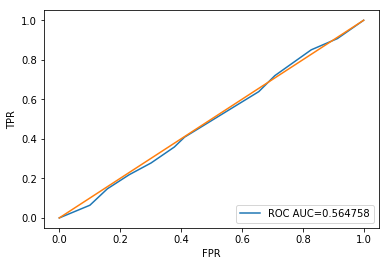

In [110]:
FPR1,TPR1,tresholds1=roc_curve(y_test,tree1.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(FPR1,TPR1,label="ROC AUC=%f"%roc_auc_score(y_test,model1.predict(x_test)))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [112]:
imp=pd.DataFrame(data=tree1.feature_importances_,index=X.columns,columns=['importances'])
imp.sort_values(by="importances",ascending=False)

,importances
Unnamed: 0,0.874553
Runtime,0.125447
Distributor,0.000000
Actors,0.000000
Producer,0.000000
Cinematography,0.000000
Editing,0.000000
Music,0.000000
